In [21]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
import datetime

CREATING AND PROCESSING DATABASES

In [33]:
#sourcing all taxi databases for december 2018
dec_2018_yellow = pd.read_csv('yellow_tripdata_dec2018.csv')
dec_2018_fhv = pd.read_csv('fhv_tripdata_dec2018.csv') 

In [28]:
#visualising
dec_2018_yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-12-01 00:28:22,2018-12-01 00:44:07,2,2.5,1,N,148,234,1,12.0,0.5,0.5,3.95,0.0,0.3,17.25
1,1,2018-12-01 00:52:29,2018-12-01 01:11:37,3,2.3,1,N,170,144,1,13.0,0.5,0.5,2.85,0.0,0.3,17.15
2,2,2018-12-01 00:12:52,2018-12-01 00:36:23,1,0.0,1,N,113,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
3,1,2018-12-01 00:35:08,2018-12-01 00:43:11,1,3.9,1,N,95,92,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55
4,1,2018-12-01 00:21:54,2018-12-01 01:15:13,1,12.8,1,N,163,228,1,45.0,0.5,0.5,9.25,0.0,0.3,55.55


In [29]:
#visualising
dec_2018_fhv.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_number,Dispatching_base_num
0,2018-12-27 11:34:53,2018-12-27 11:50:29,NaN,NaN,NaN,B03035,NaN
1,2018-12-27 11:35:11,2018-12-27 11:40:35,NaN,NaN,NaN,B03035,NaN
2,2018-12-27 11:35:12,2018-12-27 12:00:54,NaN,NaN,NaN,B03035,NaN
3,2018-12-02 08:42:00,2018-12-02 08:49:00,NaN,NaN,NaN,B00054,NaN
4,2018-12-27 11:35:31,2018-12-27 11:55:37,NaN,NaN,NaN,B03035,NaN


In [34]:
#renaming columns
dec_2018_yellow=dec_2018_yellow.rename(columns={"tpep_pickup_datetime":"pickup_time","tpep_dropoff_datetime":"dropofftime","PULocationID":"pickup_id","DOLocationID":"dropoff_id"})
dec_2018_fhv=dec_2018_fhv.rename(columns={"Pickup_DateTime":"pickup_time","DropOff_datetime":"dropofftime","PUlocationID":"pickup_id","DOlocationID":"dropoff_id"})

In [38]:
#dropping unnecessary columns
dec_2018_yellow = dec_2018_yellow.drop(columns=["VendorID","passenger_count","trip_distance","RatecodeID","store_and_fwd_flag","payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount"])

In [ ]:
#filter for trip distance greater than 0

In [35]:
#dropping all shared rides in fhv df
dec_2018_fhv = dec_2018_fhv[dec_2018_fhv['SR_Flag'].isna()]
dec_2018_fhv.head()

,pickup_time,dropofftime,pickup_id,dropoff_id,SR_Flag,Dispatching_base_number,Dispatching_base_num
0,2018-12-27 11:34:53,2018-12-27 11:50:29,NaN,NaN,NaN,B03035,NaN
1,2018-12-27 11:35:11,2018-12-27 11:40:35,NaN,NaN,NaN,B03035,NaN
2,2018-12-27 11:35:12,2018-12-27 12:00:54,NaN,NaN,NaN,B03035,NaN
3,2018-12-02 08:42:00,2018-12-02 08:49:00,NaN,NaN,NaN,B00054,NaN
4,2018-12-27 11:35:31,2018-12-27 11:55:37,NaN,NaN,NaN,B03035,NaN


In [39]:
#dropping unnecessary columns
dec_2018_fhv = dec_2018_fhv.drop(columns=["Dispatching_base_number","Dispatching_base_num"])

In [43]:
#converting to datetime
dec_2018_yellow['pickup_time'] =  pd.to_datetime(dec_2018_yellow['pickup_time'])
dec_2018_yellow['dropofftime'] =  pd.to_datetime(dec_2018_yellow['dropofftime'])
dec_2018_fhv['pickup_time'] =  pd.to_datetime(dec_2018_fhv['pickup_time'])
dec_2018_fhv['dropofftime'] =  pd.to_datetime(dec_2018_fhv['dropofftime'])

In [45]:
#dropping NAs
dec_2018_yellow = dec_2018_yellow.dropna()

In [46]:
#dropping unnecessary columns
dec_2018_fhv = dec_2018_fhv.drop(columns=["SR_Flag"])

In [47]:
#dropping NAs
dec_2018_fhv = dec_2018_fhv.dropna()

In [53]:
#converting float to int for easier appends and joins
dec_2018_fhv.pickup_id = dec_2018_fhv.pickup_id.astype(int)
dec_2018_fhv.dropoff_id = dec_2018_fhv.dropoff_id.astype(int)

In [55]:
#visualising
dec_2018_fhv.head()

,pickup_time,dropofftime,pickup_id,dropoff_id
77,2018-12-02 09:53:30,2018-12-02 10:15:53,179,181
81,2018-12-02 18:21:29,2018-12-02 18:42:30,161,79
83,2018-12-02 23:01:41,2018-12-02 23:17:06,256,225
90,2018-12-04 18:31:25,2018-12-04 19:00:32,65,50
91,2018-12-04 18:31:27,2018-12-04 18:58:50,95,132


In [56]:
#visualising
dec_2018_yellow.head()

,pickup_time,dropofftime,pickup_id,dropoff_id
0,2018-12-01 00:28:22,2018-12-01 00:44:07,148,234
1,2018-12-01 00:52:29,2018-12-01 01:11:37,170,144
2,2018-12-01 00:12:52,2018-12-01 00:36:23,113,193
3,2018-12-01 00:35:08,2018-12-01 00:43:11,95,92
4,2018-12-01 00:21:54,2018-12-01 01:15:13,163,228


In [65]:
#appending all taxi databases together
dec_2018 = dec_2018_yellow.append(dec_2018_fhv, ignore_index=True)

In [88]:
#dropping taxi id = 264
dec_2018 = dec_2018[~dec_2018.eq(264).any(1)]

In [89]:
#dropping taxi id = 265
dec_2018 = dec_2018[~dec_2018.eq(265).any(1)]

In [90]:
dec_2018.shape

(22595001, 4)

EDA

AIRPORT EDA

In [106]:
#subsetting only airport pickups
ind = (dec_2018['pickup_id'] == 1)|(dec_2018['pickup_id'] == 132)|(dec_2018['pickup_id'] == 138)
dec_2018_airport_pickup = dec_2018[ind]
dec_2018_airport_pickup.head()

,pickup_time,dropofftime,pickup_id,dropoff_id
5,2018-12-01 00:00:38,2018-12-01 00:29:26,132,97
10,2018-12-01 00:56:42,2018-12-01 01:22:35,132,170
67,2018-12-01 00:45:47,2018-12-01 01:14:10,132,66
71,2018-12-01 00:11:13,2018-12-01 00:48:13,132,166
112,2018-12-01 00:17:21,2018-12-01 00:32:00,138,162


In [92]:
#loading taxi zone shapefiles
tzs=gpd.read_file('taxi_zones/taxi_zones.shp')
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [107]:
#getting counts of december airport dropoffs in each taxi zone
dec_2018_airport_drops = dec_2018_airport_pickup['dropoff_id'].value_counts().reset_index()
dec_2018_airport_drops.columns = ['dropoff_id', 'count']
dec_2018_airport_drops

,dropoff_id,count
0,230,37340
1,161,26561
2,162,24824
3,48,22919
4,164,21646
...,...,...
256,59,17
257,99,5
258,105,2
259,2,2


In [108]:
# merge with taxi zone
tzs_yellow_airport_drops =tzs.merge(dec_2018_airport_drops, left_on = 'LocationID', right_on ='dropoff_id' )

In [109]:
#visualising
tzs_yellow_airport_drops

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,dropoff_id,count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,1794
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,2
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",3,392
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4,2262
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",5,34
...,...,...,...,...,...,...,...,...,...
254,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",259,600
255,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",260,2704
256,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",261,6781
257,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",262,7128


In [111]:
#log of count drops
tzs_yellow_airport_drops['logdrops'] = np.log(tzs_yellow_airport_drops['count'])

In [129]:
#normalising count drops
mu = tzs_yellow_airport_drops['count'].mean()
std = tzs_yellow_airport_drops['count'].std()

tzs_yellow_airport_drops['normdrops'] = (tzs_yellow_airport_drops['count']-mu)/std

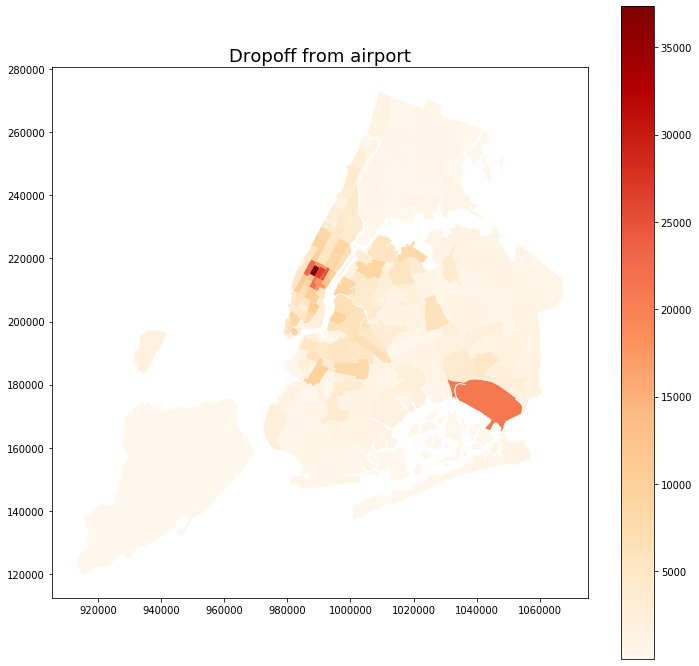

In [113]:
#visualising counts for december
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Dropoff from airport', fontsize=18)
tzs_yellow_airport_drops.plot(axes=ax, column = 'count', legend = True, cmap = "OrRd")

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


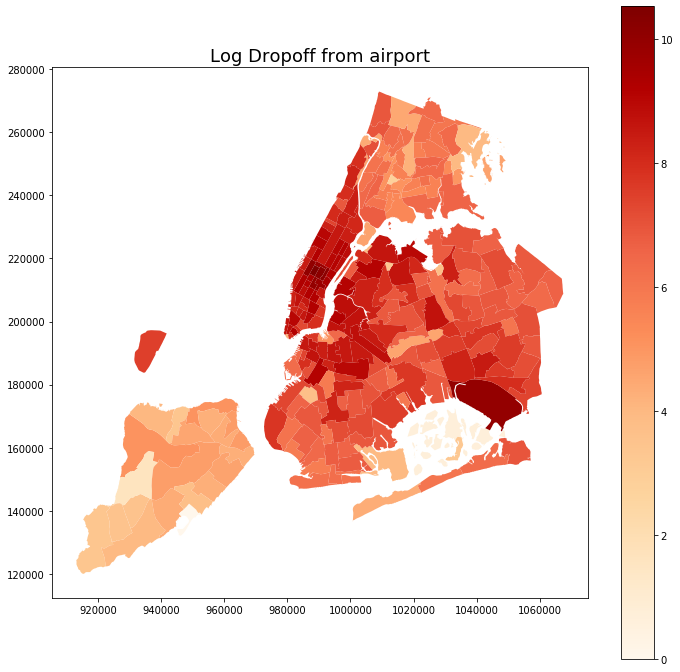

In [114]:
#visualising log counts for december
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Log Dropoff from airport', fontsize=18)
tzs_yellow_airport_drops.plot(axes=ax, column = 'logdrops', legend = True, cmap = "OrRd")

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


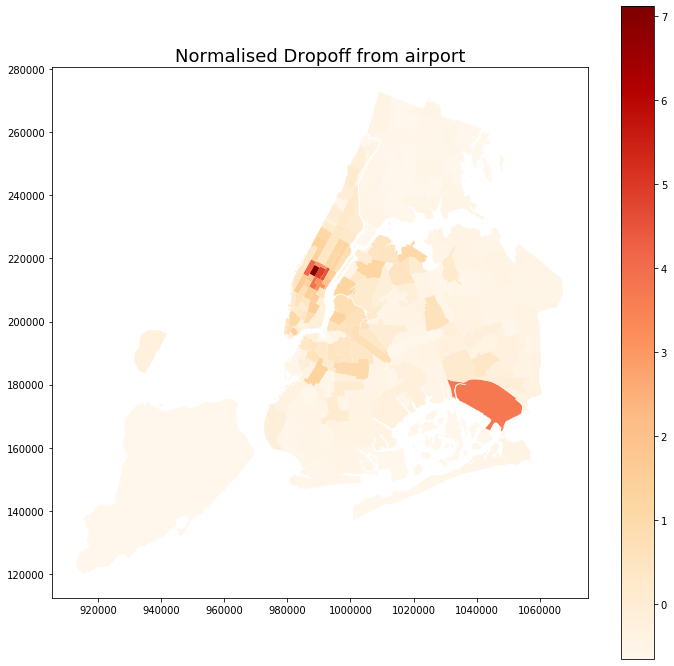

In [130]:
#visualising normalised counts for december
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Normalised Dropoff from airport', fontsize=18)
tzs_yellow_airport_drops.plot(axes=ax, column = 'normdrops', legend = True, cmap = "OrRd")

In [115]:
#filtering only the holiday weeks
dec_2018_hols = dec_2018[(dec_2018['pickup_time'] >= np.datetime64('2018-12-18')) & (dec_2018['pickup_time'] <= np.datetime64('2019-01-01'))]
dec_2018_hols.head()

,pickup_time,dropofftime,pickup_id,dropoff_id
3926886,2018-12-18 08:19:58,2018-12-18 08:33:30,234,148
3926887,2018-12-18 08:58:26,2018-12-18 16:37:08,12,186
3941618,2018-12-19 16:39:23,2018-12-19 17:01:23,186,43
3957807,2018-12-21 00:29:17,2018-12-21 00:41:53,163,246
3957808,2018-12-21 00:57:15,2018-12-21 01:08:06,230,186


In [118]:
#subsetting airport data for holiday weeks
ind1 = (dec_2018_hols['pickup_id'] == 1)|(dec_2018_hols['pickup_id'] == 132)|(dec_2018_hols['pickup_id'] == 138)
dec_2018_airport_pickup_hols = dec_2018_hols[ind1]
dec_2018_airport_pickup_hols.head()

,pickup_time,dropofftime,pickup_id,dropoff_id
4042339,2018-12-27 16:48:57,2018-12-27 17:13:28,138,244
4967784,2018-12-18 00:03:35,2018-12-18 00:25:48,138,203
4967938,2018-12-18 00:00:03,2018-12-18 00:26:40,132,43
4970484,2018-12-18 00:00:35,2018-12-18 00:14:23,132,205
4970563,2018-12-18 00:00:08,2018-12-18 00:25:52,132,162


In [119]:
#getting counts of airport drops for holiday weeks
dec_2018_airport_drops_hols = dec_2018_airport_pickup_hols['dropoff_id'].value_counts().reset_index()
dec_2018_airport_drops_hols.columns = ['dropoff_id', 'count']
dec_2018_airport_drops_hols

,dropoff_id,count
0,230,12069
1,132,8818
2,48,8309
3,161,7852
4,162,7145
...,...,...
255,59,11
256,30,8
257,99,4
258,110,1


In [120]:
#merge with taxi zone
tzs_yellow_airport_drops_hols =tzs.merge(dec_2018_airport_drops_hols, left_on = 'LocationID', right_on ='dropoff_id' )

In [121]:
#log of drops of holidays 
tzs_yellow_airport_drops_hols['logdrops'] = np.log(tzs_yellow_airport_drops_hols['count'])

In [136]:
#normalising drops in holidays
mu = tzs_yellow_airport_drops_hols['count'].mean()
std = tzs_yellow_airport_drops_hols['count'].std()

tzs_yellow_airport_drops_hols['normdrops'] = (tzs_yellow_airport_drops_hols['count']-mu)/std

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


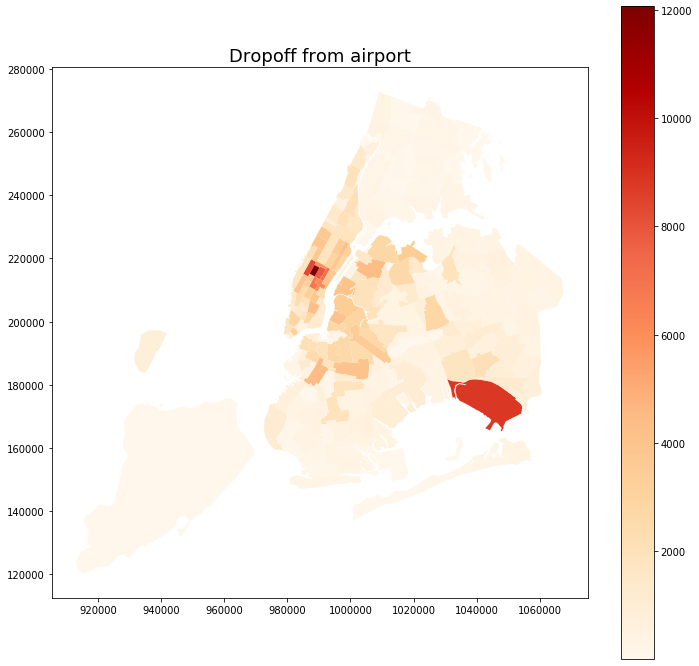

In [123]:
#visualising count of drops during holiday period
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Dropoff from airport', fontsize=18)
tzs_yellow_airport_drops_hols.plot(axes=ax, column = 'count', legend = True, cmap = "OrRd")

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


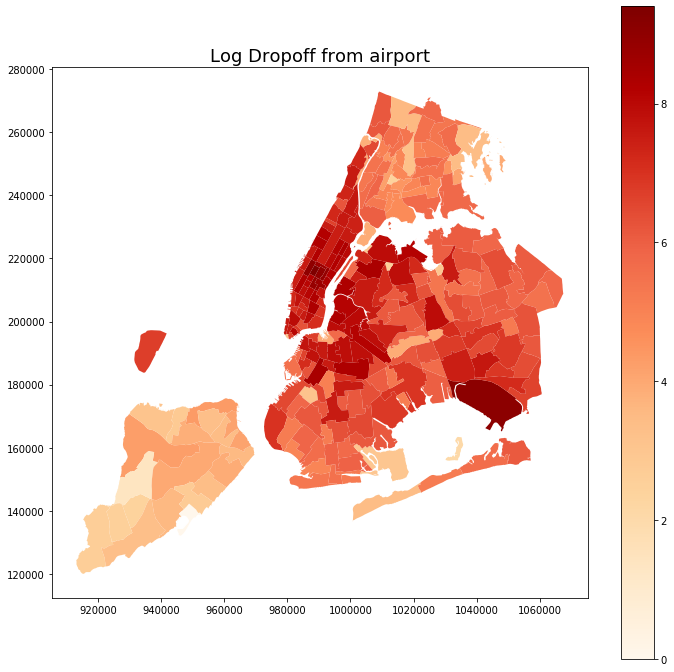

In [124]:
#visualising log of drops during holiday period
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Log Dropoff from airport', fontsize=18)
tzs_yellow_airport_drops_hols.plot(axes=ax, column = 'logdrops', legend = True, cmap = "OrRd")

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


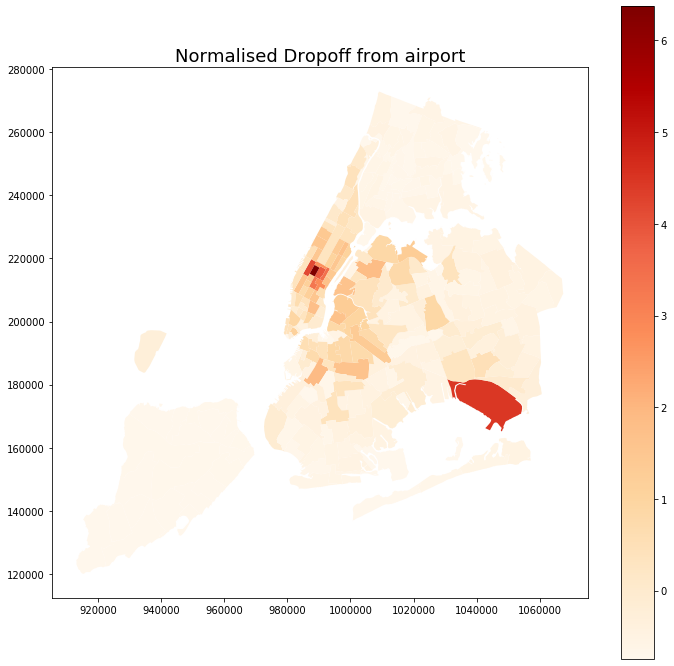

In [137]:
#visualising normalised drops during holiday period
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Normalised Dropoff from airport', fontsize=18)
tzs_yellow_airport_drops_hols.plot(axes=ax, column = 'normdrops', legend = True, cmap = "OrRd")

In [138]:
# Top 10 dropoff Locations during december holidays
tzs_yellow_airport_drops_hols.nlargest(10,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
224,12069,230,Times Sq/Theatre District,Manhattan
127,8818,132,JFK Airport,Queens
46,8309,48,Clinton East,Manhattan
156,7852,161,Midtown Center,Manhattan
157,7145,162,Midtown East,Manhattan
159,6900,164,Midtown South,Manhattan
165,6096,170,Murray Hill,Manhattan
158,5909,163,Midtown North,Manhattan
176,4510,181,Park Slope,Brooklyn
5,4393,7,Astoria,Queens


In [139]:
# Top 10 dropoff Locations during december
tzs_yellow_airport_drops.nlargest(10,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
225,37340,230,Times Sq/Theatre District,Manhattan
157,26561,161,Midtown Center,Manhattan
158,24824,162,Midtown East,Manhattan
47,22919,48,Clinton East,Manhattan
160,21646,164,Midtown South,Manhattan
128,21051,132,JFK Airport,Queens
159,18199,163,Midtown North,Manhattan
166,18144,170,Murray Hill,Manhattan
228,12446,233,UN/Turtle Bay South,Manhattan
99,11990,100,Garment District,Manhattan


TRIPS EDA

In [144]:
# converting datetime to day, week, hour
def month_preprocess(df_o):
    df = df_o.copy()
    ind = df['trip_distance'] > 0
    df = df[ind]
    # convert to datetime object
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format ='%Y-%m-%d %H:%M:%S')
    df['DOW'] = df['tpep_pickup_datetime'].dt.weekday
    df['HOD'] = df['tpep_pickup_datetime'].dt.hour
    df['DOM'] = df['tpep_pickup_datetime'].dt.day
    # keep only hour information
    df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: x.replace(minute=0,second=0))
    # Define essential columns
    essential = ['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','PULocationID','DOLocationID','DOW','HOD','DOM']
    df = df[essential]
    return df

In [145]:
# create dropoff time features
dec_2018['DOW'] = dec_2018['dropofftime'].dt.weekday
dec_2018['HOD'] = dec_2018['dropofftime'].dt.hour
dec_2018['DOM'] = dec_2018['dropofftime'].dt.day
# keep only hour information
dec_2018['dropofftime'] = dec_2018['dropofftime'].apply(lambda x: x.replace(minute=0,second=0))

In [146]:
dec_2018.head()

,pickup_time,dropofftime,pickup_id,dropoff_id,DOW,HOD,DOM
0,2018-12-01 00:28:22,2018-12-01 00:00:00,148,234,5,0,1
1,2018-12-01 00:52:29,2018-12-01 01:00:00,170,144,5,1,1
2,2018-12-01 00:12:52,2018-12-01 00:00:00,113,193,5,0,1
3,2018-12-01 00:35:08,2018-12-01 00:00:00,95,92,5,0,1
4,2018-12-01 00:21:54,2018-12-01 01:00:00,163,228,5,1,1


In [151]:
#getting counts of december dropoffs in each taxi zone
dec_2018_drops_month = dec_2018['DOM'].value_counts().reset_index()
dec_2018_drops_month.columns = ['DOM', 'count']
dec_2018_drops_month

,DOM,count
0,8,918163
1,15,912414
2,1,896309
3,14,876190
4,7,861062
5,16,858767
6,21,815003
7,13,804367
8,20,795644
9,6,784427


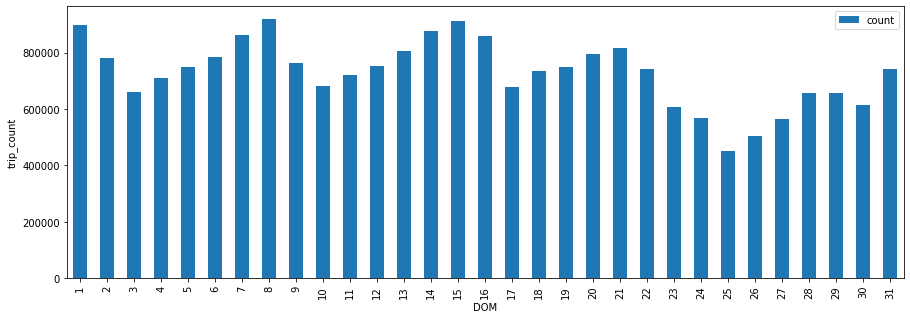

In [152]:
# Count number of trips in December
dec_2018_drops_month = dec_2018_drops_month.sort_values(by=['DOM'])

ax = dec_2018_drops_month.plot(x='DOM', y='count', kind='bar', style="-o", figsize=(15,5))
ax.set_ylabel("trip_count")
plt.show()

In [153]:
#getting counts of december dropoffs in each taxi zone
dec_2018_drops_day = dec_2018['HOD'].value_counts().reset_index()
dec_2018_drops_day.columns = ['HOD', 'count']
dec_2018_drops_day

,HOD,count
0,19,1460672
1,18,1417683
2,20,1352400
3,21,1287806
4,17,1246755
5,22,1245007
6,15,1142695
7,16,1141750
8,23,1122846
9,14,1096129


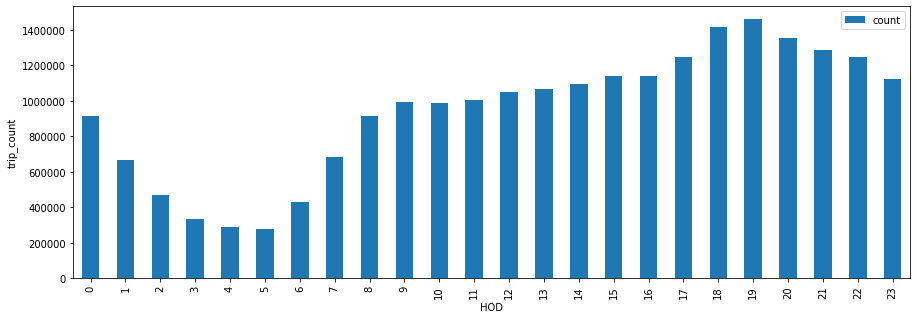

In [154]:
# Count number of trips in December
dec_2018_drops_day = dec_2018_drops_day.sort_values(by=['HOD'])

ax = dec_2018_drops_day.plot(x='HOD', y='count', kind='bar', style="-o", figsize=(15,5))
ax.set_ylabel("trip_count")
plt.show()

In [156]:
#getting counts of december dropoffs in each taxi zone
dec_2018_drops_week = dec_2018['DOW'].value_counts().reset_index()
dec_2018_drops_week.columns = ['DOW', 'count']
dec_2018_drops_week

,DOW,count
0,5,4117579
1,6,3623188
2,0,3327105
3,4,3208030
4,3,2949034
5,2,2750765
6,1,2619300


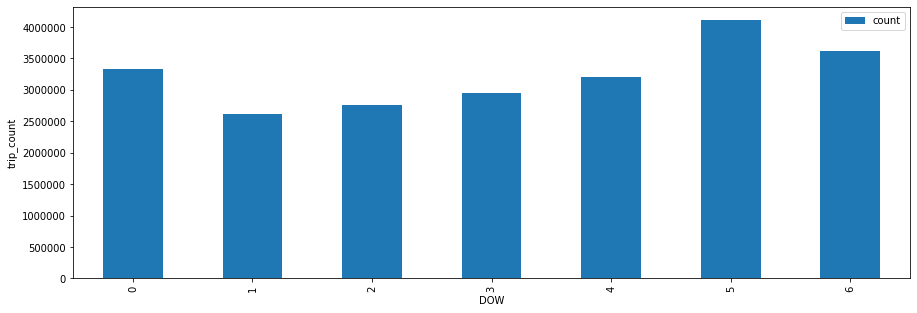

In [157]:
# Count number of trips in December
dec_2018_drops_week = dec_2018_drops_week.sort_values(by=['DOW'])

ax = dec_2018_drops_week.plot(x='DOW', y='count', kind='bar', style="-o", figsize=(15,5))
ax.set_ylabel("trip_count")
plt.show()

TOURIST HOTSPOT ANALYSIS

In [158]:
import networkx as nx 

In [159]:
dec_2018_hols_nw = dec_2018_hols

In [161]:
# create dropoff time features
dec_2018_hols_nw['DOW'] = dec_2018_hols_nw['dropofftime'].dt.weekday
dec_2018_hols_nw['HOD'] = dec_2018_hols_nw['dropofftime'].dt.hour
dec_2018_hols_nw['DOM'] = dec_2018_hols_nw['dropofftime'].dt.day
# keep only hour information
dec_2018_hols_nw['dropofftime'] = dec_2018_hols_nw['dropofftime'].apply(lambda x: x.replace(minute=0,second=0))

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value

In [162]:
dec_2018_hols_nw.head()

,pickup_time,dropofftime,pickup_id,dropoff_id,DOW,HOD,DOM
3926886,2018-12-18 08:19:58,2018-12-18 08:00:00,234,148,1,8,18
3926887,2018-12-18 08:58:26,2018-12-18 16:00:00,12,186,1,16,18
3941618,2018-12-19 16:39:23,2018-12-19 17:00:00,186,43,2,17,19
3957807,2018-12-21 00:29:17,2018-12-21 00:00:00,163,246,4,0,21
3957808,2018-12-21 00:57:15,2018-12-21 01:00:00,230,186,4,1,21


In [163]:
#creating tuples for assigning weights
dec_2018_hols_nw['pick_dest_tup'] = dec_2018_hols_nw.apply(lambda df: (df.pickup_id,df.dropoff_id),axis=1)

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [164]:
#getting counts of december dropoffs in each taxi zone
dec_2018_drops_day_nw = dec_2018_hols_nw['HOD'].value_counts().reset_index()
dec_2018_drops_day_nw.columns = ['HOD', 'count']
dec_2018_drops_day_nw

,HOD,count
0,19,595399
1,18,581516
2,20,552576
3,21,532780
4,17,523138
5,22,518666
6,16,483603
7,15,477699
8,23,468971
9,14,456705


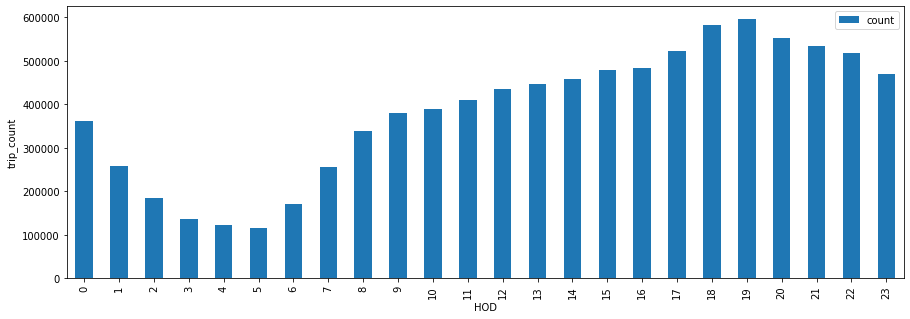

In [165]:
# Count number of trips in December
dec_2018_drops_day_nw = dec_2018_drops_day_nw.sort_values(by=['HOD'])

ax = dec_2018_drops_day_nw.plot(x='HOD', y='count', kind='bar', style="-o", figsize=(15,5))
ax.set_ylabel("trip_count")
plt.show()

In [169]:
dec_2018_hols_nw_g = dec_2018_hols_nw.groupby('pick_dest_tup').agg({'pickup_time':'count'})
dec_2018_hols_nw_g.reset_index(inplace=True)
dec_2018_hols_nw_g['pickup'] = dec_2018_hols_nw_g.apply(lambda x: x.pick_dest_tup[0], axis=1)
dec_2018_hols_nw_g['dest'] = dec_2018_hols_nw_g.apply(lambda x: x.pick_dest_tup[1], axis=1)
dec_2018_hols_nw_g.head()

,pick_dest_tup,pickup_time,pickup,dest
0,"(0, 0)",319,0,0
1,"(1, 1)",261,1,1
2,"(1, 4)",7,1,4
3,"(1, 7)",3,1,7
4,"(1, 13)",16,1,13


In [171]:
#dropping taxi id = 0
dec_2018_hols_nw_g = dec_2018_hols_nw_g[~dec_2018_hols_nw_g.eq(0).any(1)]

In [173]:
taxi_graph = nx.Graph()
nx.set_edge_attributes(taxi_graph,'weight', 0)
for k in dec_2018_hols_nw_g.index:
    taxi_graph.add_edge(dec_2018_hols_nw_g['pickup'][k]-1,dec_2018_hols_nw_g['dest'][k]-1,weight=dec_2018_hols_nw_g['pickup_time'][k])

In [178]:
workfolder = '/Users/akashyadav/Desktop/nyuclass/ADS_project-master/CommunityDetectionData/'

In [179]:
#interface for running compiled combo over the network G given a maximal number of communities maxcom
def getComboPartition(G,maxcom):
    #save network in net format
    nodes={}
    nodenum={}
    i=0
    #create a dictionary transforming nodes to unique numbers
    for n in list(G.nodes()):
        nodenum[n]=i
        nodes[i]=n
        i+=1
    f = open(workfolder+'combo/temp.net', 'w')
    f.write('*Arcs\n')
    for e in G.edges(data=True):
        f.write('{0} {1} {2}\n'.format(nodenum[e[0]],nodenum[e[1]],e[2]['weight']))
    f.close()
    #run combo
    command=workfolder+'/combo/comboCPP '+workfolder+'combo/temp.net'
    if maxcom<Inf:
        command=command+' {0}'.format(maxcom)  
    os.system(command)
    #read resulting partition
    f = open(workfolder+'combo/temp_comm_comboC++.txt', 'r')
    i=0
    partition={}
    for line in f:
        partition[nodes[i]]=int(line)
        i+=1
    return partition    

In [180]:
def modularity(G,partition):
    #compute network modularity according to the given partitioning
    nodes=list(G.nodes())
    #compute node weights and total network weight
    if G.is_directed():
        w1=G.out_degree(weight='weight')
        w2=G.in_degree(weight='weight')
        T=1.0*sum([e[2]['weight'] for e in G.edges(data=True)])
    else:
        w1=G.degree(weight='weight')
        w2=G.degree(weight='weight')
        T=1.0*sum([(1+(e[0]!=e[1]))*e[2]['weight'] for e in G.edges(data=True)])
    M=0 #start accumulating modularity score
    for a in nodes:
        for b in nodes:
            #if (G.is_directed())|(b>=a):
                if partition[a]==partition[b]: #if nodes belong to the same community
                    #get edge weight
                    if G.has_edge(a,b):
                        e=G[a][b]['weight']
                    else:
                        e=0
                    M+=e/T-w1[a]*w2[b]/(T**2) #add modularity score for the considered edge 
    return M                

In [186]:
import os
from networkx.algorithms import community
from numpy import Inf

In [187]:
#partition the network using combo
PCtaxi = getComboPartition(taxi_graph,Inf)
modularity(taxi_graph,PCtaxi)

0.4013759952365082

In [191]:
def visualizePartitionShape(gdf,Y,idfield): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize shapes using communities for picking colors        
    colors=['green','blue','red','yellow','magenta','orange']
    f, ax = plt.subplots(1, figsize=(35, 35))
    for c in range(max(Y.values())+1): #for each cluster
        if idfield=='index':
            ID=gdf.index
        else:
            ID=gdf[idfield]
        print(c,colors[c])
        gdf.loc[ID.map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color
        gdf['coords'] = gdf['geometry'].apply(lambda x:x.representative_point().coords[:])
        gdf['coords'] = [coords[0] for coords in gdf['coords']]
        #print(gdf['coords'])
        for idx,row in gdf.iterrows():
            plt.annotate(s=row['zone'],xy=row['coords'],horizontalalignment='center')
        

0 green


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


1 blue


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


2 red


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


3 yellow


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


4 magenta


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


5 orange


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


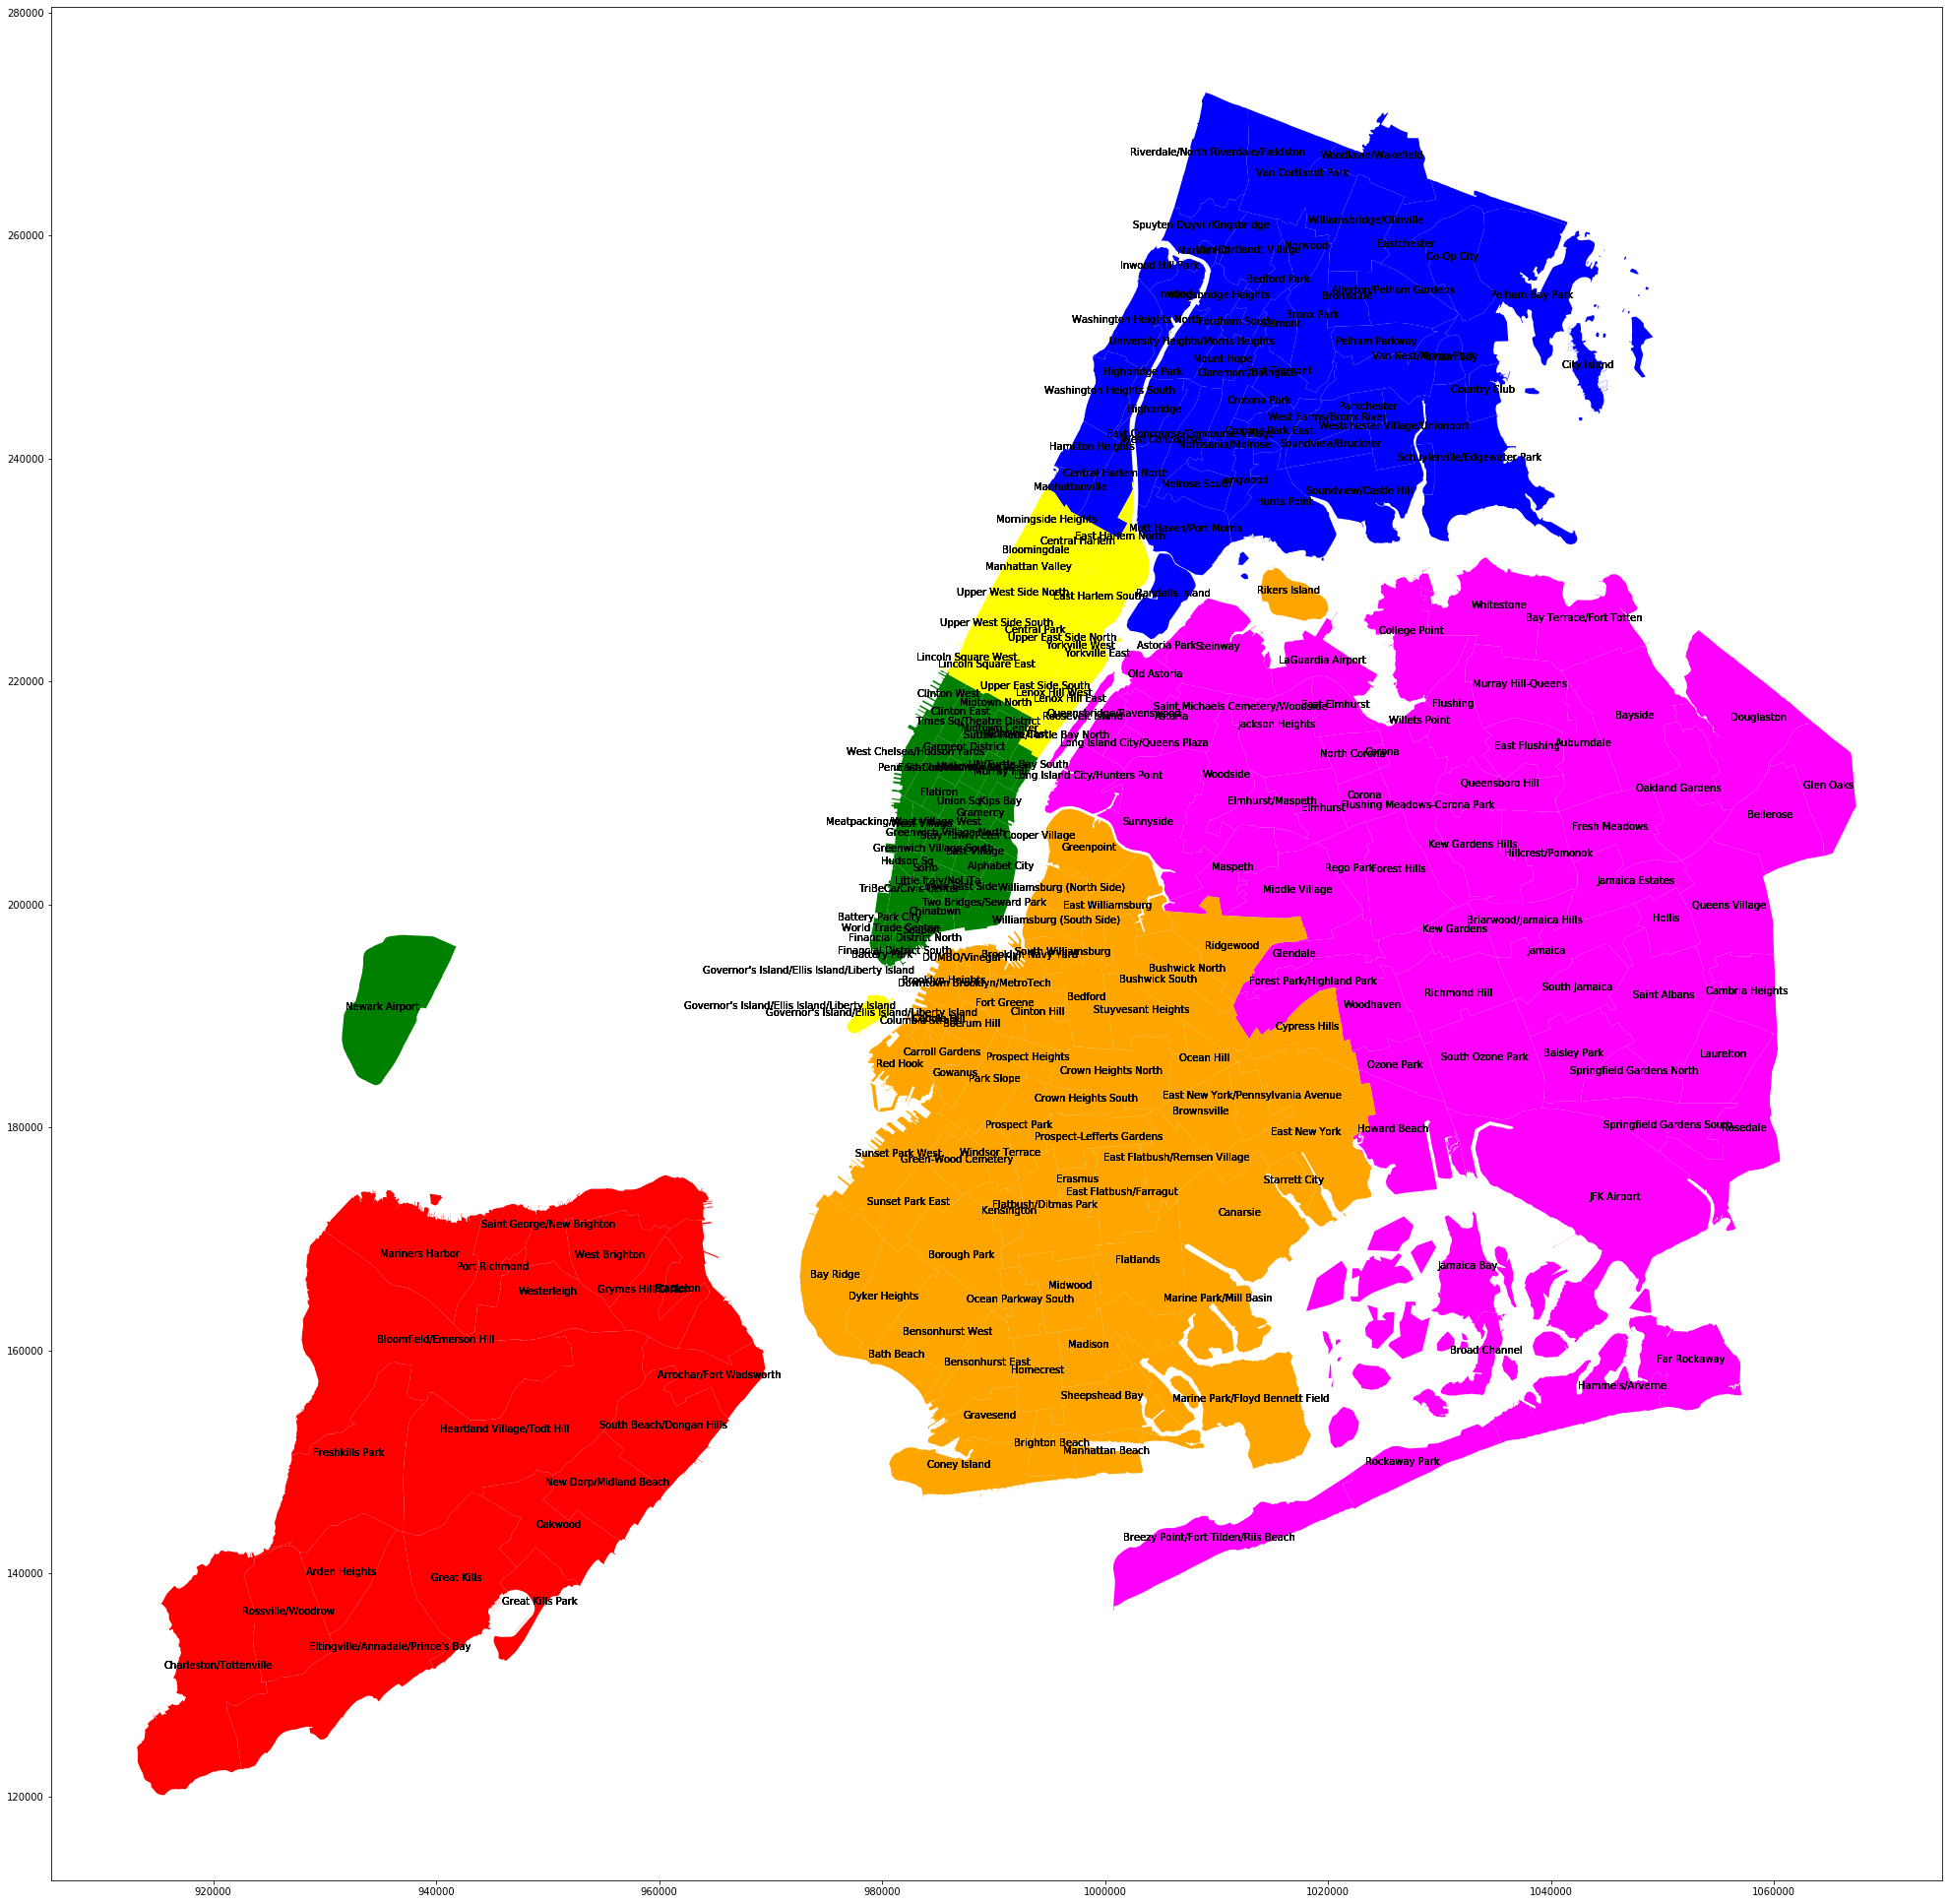

In [192]:
visualizePartitionShape(tzs,PCtaxi,'index')

In [193]:
pcount = dec_2018_hols.groupby('pickup_id').agg({'pickup_time':'count'})
pcount 

,pickup_time
pickup_id,
0,319
1,1338
2,7
3,10703
4,30322
...,...
259,12792
260,28123
261,46390


In [194]:
dcount = dec_2018_hols.groupby('dropoff_id').agg({'dropofftime':'count'})
dcount 

,dropofftime
dropoff_id,
0,3694
1,64676
2,22
3,10523
4,33773
...,...
259,15852
260,32365
261,41213


In [198]:
orgdes = pcount.merge(dcount, right_on = dcount.index, left_on = pcount.index,)
orgdes.head()

,key_0,pickup_time,dropofftime
0,0,319,3694
1,1,1338,64676
2,2,7,22
3,3,10703,10523
4,4,30322,33773


In [202]:
orgdes = orgdes.rename(columns={"key_0":"taxizone","pickup_time":"pickups","dropofftime":"dropoffs"})

In [203]:
col_list = ["taxizone"]

ognorm = pd.DataFrame(data=orgdes,columns=col_list)
ognorm.head()

,taxizone
0,0
1,1
2,2
3,3
4,4


In [204]:
mu_p = orgdes.pickups.mean()
std_p = orgdes.pickups.std()
mu_d = orgdes.dropoffs.mean()
std_d = orgdes.dropoffs.std()


ognorm['normpickups'] = (orgdes.pickups-mu_p)/std_p
ognorm['normdropoff'] = (orgdes.dropoffs-mu_d)/std_d

ognorm.head()

,taxizone,normpickups,normdropoff
0,0,-0.787130,-0.742293
1,1,-0.764058,0.699816
2,2,-0.794194,-0.829129
3,3,-0.552015,-0.580800
4,4,-0.107801,-0.030982


In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [211]:
#Trying silhoutte score 
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(ognorm.iloc[:,1:])
    #report average Silhouette score
    silhouette_avg = silhouette_score(ognorm.iloc[:,1:], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.7573718027388692
For n_clusters =3, the average silhouette_score is :0.6771780509268349
For n_clusters =4, the average silhouette_score is :0.6347705658981909
For n_clusters =5, the average silhouette_score is :0.5723139054878439
For n_clusters =6, the average silhouette_score is :0.5489002876630565


In [212]:
n=2
km=KMeans(random_state=100,n_clusters=n)
res=km.fit_predict(ognorm.iloc[:,1:])
res

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int32)

In [213]:
clust_name=[]
clust_name={z:res[z] for z in orgdes.index}

In [214]:
ognorm['cluster']= ognorm.index.map(clust_name)
ognorm

,taxizone,normpickups,normdropoff,cluster
0,0,-0.787130,-0.742293,0
1,1,-0.764058,0.699816,0
2,2,-0.794194,-0.829129,0
3,3,-0.552015,-0.580800,0
4,4,-0.107801,-0.030982,0
...,...,...,...,...
257,259,-0.504716,-0.454780,0
258,260,-0.157591,-0.064278,0
259,261,0.256011,0.144960,0
260,262,0.775600,0.721052,0


In [215]:
# merge with taxi zone
ognorm =tzs.merge(ognorm, left_on = 'LocationID', right_on ='taxizone')
ognorm.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,normpickups,normdropoff,cluster
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...","(935223.026585771, 190535.05257488793)",1,-0.764058,0.699816,0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...","(1032515.6723034503, 167292.49319458753)",2,-0.794194,-0.829129,0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...","(1025882.734753933, 254779.60063055903)",3,-0.552015,-0.580800,0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...","(990618.795051066, 203105.53231811523)",4,-0.107801,-0.030982,0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...","(931467.962751084, 139837.47838920355)",5,-0.757333,-0.789661,0


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


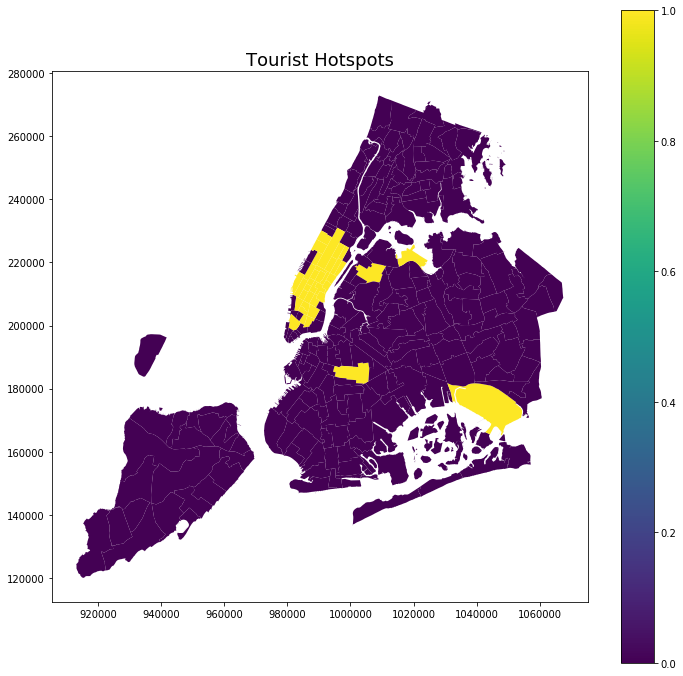

In [216]:
#visualize the resulting clustering
f, ax = plt.subplots( figsize=(12, 12))
ax.set_title('Tourist Hotspots', fontsize=18)
ognorm.plot(axes=ax, column="cluster" ,legend=True)

In [217]:
ind = (ognorm.cluster == 1)

In [218]:
orgdestouristnorm = ognorm[ind].copy()
orgdestouristnorm

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,normpickups,normdropoff,cluster
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,0.851406,0.988489,1
42,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,1.052286,1.032971,1
47,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,3.711637,3.362075,1
60,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,0.995432,1.142888,1
67,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,2.508145,2.699572,1
78,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,3.334376,2.757747,1
89,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,1.438604,1.038623,1
99,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,1.771532,1.443834,1
103,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,2.204855,1.877848,1
109,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,1.274200,0.955642,1


In [220]:
orgdestouristnorm.shape

(37, 12)

In [242]:
col_list = ["taxizone"]

ogdf = pd.DataFrame(data=orgdes,columns=col_list)
ogdf.head()

,taxizone
0,1
1,2
2,3
3,4
4,5


In [243]:
ogdf['logpickups'] = np.log(orgdes['pickups'])
ogdf['logdropoff'] = np.log(orgdes['dropoffs'])

ogdf.head()

,taxizone,logpickups,logdropoff
0,1,7.198931,11.077145
1,2,1.945910,3.091042
2,3,9.278279,9.261319
3,4,10.319629,10.427417
4,5,7.399398,7.433075


In [244]:
#Trying silhoutte score 
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(ogdf.iloc[:,1:])
    #report average Silhouette score
    silhouette_avg = silhouette_score(ogdf.iloc[:,1:], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5578583885812242
For n_clusters =3, the average silhouette_score is :0.5360840790012412
For n_clusters =4, the average silhouette_score is :0.5521890767195039
For n_clusters =5, the average silhouette_score is :0.5616014142179502
For n_clusters =6, the average silhouette_score is :0.5447742211052313


In [245]:
n=2
km=KMeans(random_state=2015,n_clusters=n)
res=km.fit_predict(ogdf.iloc[:,1:])
res

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [246]:
clust_name=[]
clust_name={z:res[z] for z in ogdf.index}

In [247]:
ogdf['cluster']= ogdf.index.map(clust_name)
ogdf

,taxizone,logpickups,logdropoff,cluster
0,1,7.198931,11.077145,1
1,2,1.945910,3.091042,1
2,3,9.278279,9.261319,0
3,4,10.319629,10.427417,0
4,5,7.399398,7.433075,1
...,...,...,...,...
255,259,9.456575,9.671051,0
256,260,10.244343,10.384833,0
257,261,10.744839,10.626509,0
258,262,11.146748,11.090935,0


In [248]:
# merge with taxi zone
ogdf =tzs.merge(ogdf, left_on = 'LocationID', right_on ='taxizone')
ogdf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,logpickups,logdropoff,cluster
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...","(935223.026585771, 190535.05257488793)",1,7.198931,11.077145,1
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...","(1032515.6723034503, 167292.49319458753)",2,1.945910,3.091042,1
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...","(1025882.734753933, 254779.60063055903)",3,9.278279,9.261319,0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...","(990618.795051066, 203105.53231811523)",4,10.319629,10.427417,0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...","(931467.962751084, 139837.47838920355)",5,7.399398,7.433075,1


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


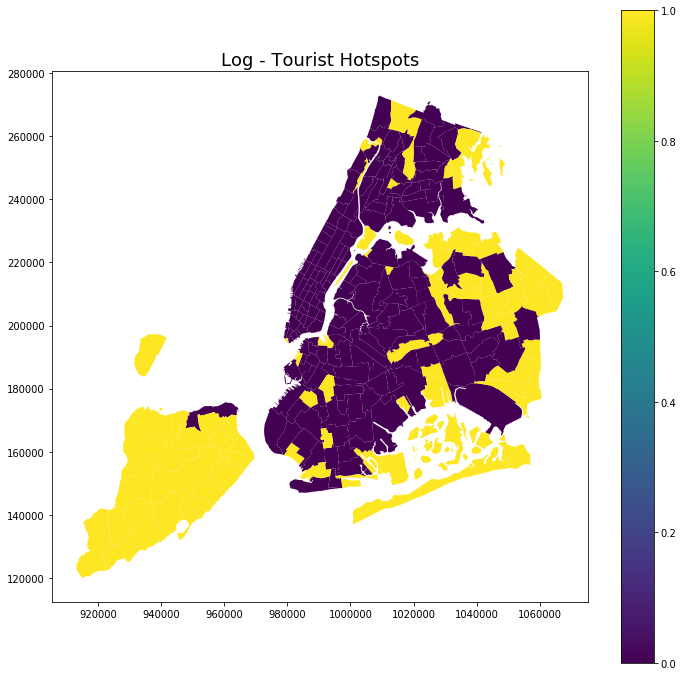

In [249]:
#visualize the resulting clustering
f, ax = plt.subplots( figsize=(12, 12))
ax.set_title('Log - Tourist Hotspots', fontsize=18)
ogdf.plot(axes=ax, column="cluster" ,legend=True)

In [236]:
ind1 = (ogdf.cluster == 1)

In [240]:
orgdestouristlog = ogdf[ind1].copy()
orgdestouristlog

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,logpickups,logdropoff,cluster
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,11.193904,11.250040,1
12,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.310 201248.869, 980697.386 20...","(979781.1033032676, 198536.38051874936)",13,10.945706,10.994840,1
16,17,0.093523,0.000323,Bedford,17,Brooklyn,"POLYGON ((1000036.904 194829.434, 1000276.454 ...","(998342.7422752953, 191392.63949839026)",17,10.768022,10.839444,1
35,36,0.087051,0.000248,Bushwick North,36,Brooklyn,"POLYGON ((1008497.035 195728.645, 1008702.936 ...","(1007385.5227412282, 193982.90007202327)",36,10.780164,10.828342,1
36,37,0.142810,0.000452,Bushwick South,37,Brooklyn,"POLYGON ((1002791.711 196025.081, 1002823.637 ...","(1004784.2462355084, 192954.14067471027)",37,11.005378,11.081296,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,0.062384,0.000172,Williamsburg (North Side),255,Brooklyn,"POLYGON ((994849.011 203499.267, 994911.093 20...","(996132.6237958565, 201170.1111145094)",255,11.101251,11.115771,1
252,256,0.067915,0.000169,Williamsburg (South Side),256,Brooklyn,"POLYGON ((995798.638 199155.970, 996223.601 19...","(995586.7324526698, 198307.28268432617)",256,10.822933,10.866566,1
257,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...","(980668.1871678794, 197575.6898618415)",261,10.744839,10.626509,1
258,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....","(999253.1085677049, 222193.81875760853)",262,11.146748,11.090935,1


In [239]:
orgdestouristlog.shape

(73, 12)

In [230]:
#Trying silhoutte score 
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(orgdes.iloc[:,1:])
    #report average Silhouette score
    silhouette_avg = silhouette_score(orgdes.iloc[:,1:], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.758053643398504
For n_clusters =3, the average silhouette_score is :0.677286911848587
For n_clusters =4, the average silhouette_score is :0.6361447835616381
For n_clusters =5, the average silhouette_score is :0.5721490545898057
For n_clusters =6, the average silhouette_score is :0.5564326036339693


In [231]:
n=2
km=KMeans(random_state=2015,n_clusters=n)
res=km.fit_predict(orgdes.iloc[:,1:])
res

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int32)

In [232]:
clust_name=[]
clust_name={z:res[z] for z in orgdes.index}

In [233]:
orgdes['cluster']= orgdes.index.map(clust_name)
orgdes

,taxizone,pickups,dropoffs,cluster
0,0,319,3694,0
1,1,1338,64676,0
2,2,7,22,0
3,3,10703,10523,0
4,4,30322,33773,0
...,...,...,...,...
257,259,12792,15852,0
258,260,28123,32365,0
259,261,46390,41213,0
260,262,69338,65574,0


In [234]:
# merge with taxi zone
orgdes =tzs.merge(orgdes, left_on = 'LocationID', right_on ='taxizone')
orgdes.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...","(935223.026585771, 190535.05257488793)",1,1338,64676,0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...","(1032515.6723034503, 167292.49319458753)",2,7,22,0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...","(1025882.734753933, 254779.60063055903)",3,10703,10523,0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...","(990618.795051066, 203105.53231811523)",4,30322,33773,0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...","(931467.962751084, 139837.47838920355)",5,1635,1691,0


/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


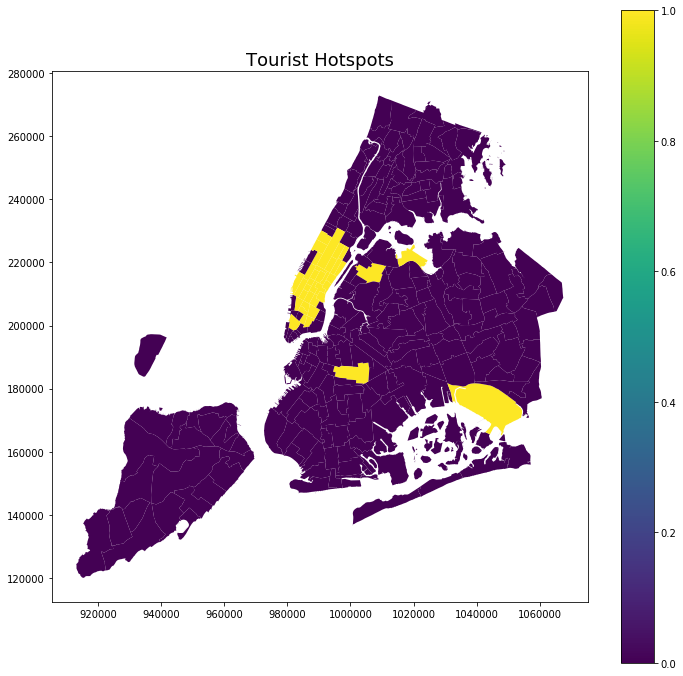

In [235]:
#visualize the resulting clustering
f, ax = plt.subplots( figsize=(12, 12))
ax.set_title('Tourist Hotspots', fontsize=18)
orgdes.plot(axes=ax, column="cluster" ,legend=True)

In [282]:
ind2 = (orgdes.cluster == 1)

In [283]:
orgdestourist = orgdes[ind2].copy()
orgdestourist

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
42,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
47,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
60,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
67,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
78,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
89,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
99,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
103,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
109,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [284]:
orgdestourist.shape

(37, 12)

In [287]:
orgdestourist.nlargest(10,'dropoffs')[['dropoffs','LocationID','zone','borough']]

,dropoffs,LocationID,zone,borough
157,221783,161,Midtown Center,Manhattan
128,195274,132,JFK Airport,Queens
47,177254,48,Clinton East,Manhattan
134,172920,138,LaGuardia Airport,Queens
232,172576,236,Upper East Side North,Manhattan
233,172194,237,Upper East Side South,Manhattan
226,165333,230,Times Sq/Theatre District,Manhattan
158,159479,162,Midtown East,Manhattan
182,154340,186,Penn Station/Madison Sq West,Manhattan
78,151699,79,East Village,Manhattan


In [286]:
orgdestourist.nsmallest(5,'dropoffs')[['dropoffs','LocationID','zone','borough']]

,dropoffs,LocationID,zone,borough
110,70206,114,Greenwich Village South,Manhattan
109,75494,113,Greenwich Village North,Manhattan
6,76883,7,Astoria,Queens
42,78764,43,Central Park,Manhattan
89,79003,90,Flatiron,Manhattan


FINDING TOURIST HOTSPOTS BASED ON TIME 

In [250]:
dec_2018_hols.head()

,pickup_time,dropofftime,pickup_id,dropoff_id,DOW,HOD,DOM,pick_dest_tup
3926886,2018-12-18 08:19:58,2018-12-18 08:00:00,234,148,1,8,18,"(234, 148)"
3926887,2018-12-18 08:58:26,2018-12-18 16:00:00,12,186,1,16,18,"(12, 186)"
3941618,2018-12-19 16:39:23,2018-12-19 17:00:00,186,43,2,17,19,"(186, 43)"
3957807,2018-12-21 00:29:17,2018-12-21 00:00:00,163,246,4,0,21,"(163, 246)"
3957808,2018-12-21 00:57:15,2018-12-21 01:00:00,230,186,4,1,21,"(230, 186)"


In [251]:
dec_hols_hot = dec_2018_hols

In [263]:
def morn(row):
    if 8 <= row['HOD'] <= 12:
        val = 1
    elif 12 < row['HOD'] <= 17:
        val = 2
    elif 17 < row['HOD'] <= 23:
        val = 3
    else:
        val = 0
    return val

In [264]:
dec_hols_hot['cat_time'] = dec_hols_hot.apply(morn, axis=1)

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
dec_hols_hot

,pickup_time,dropofftime,pickup_id,dropoff_id,DOW,HOD,DOM,pick_dest_tup,cat_time
3926886,2018-12-18 08:19:58,2018-12-18 08:00:00,234,148,1,8,18,"(234, 148)",1
3926887,2018-12-18 08:58:26,2018-12-18 16:00:00,12,186,1,16,18,"(12, 186)",2
3941618,2018-12-19 16:39:23,2018-12-19 17:00:00,186,43,2,17,19,"(186, 43)",2
3957807,2018-12-21 00:29:17,2018-12-21 00:00:00,163,246,4,0,21,"(163, 246)",0
3957808,2018-12-21 00:57:15,2018-12-21 01:00:00,230,186,4,1,21,"(230, 186)",0
...,...,...,...,...,...,...,...,...,...
23537317,2018-12-18 13:30:00,2018-12-18 13:00:00,119,75,1,13,18,"(119, 75)",2
23537318,2018-12-20 13:30:00,2018-12-20 14:00:00,119,75,3,14,20,"(119, 75)",2
23537319,2018-12-24 13:30:00,2018-12-24 14:00:00,119,75,0,14,24,"(119, 75)",2
23537322,2018-12-21 08:21:00,2018-12-21 08:00:00,74,75,4,8,21,"(74, 75)",1


In [268]:
#dec_hols_hot = dec_hols_hot.drop(columns=["morning_trips","noon_trips"])

In [292]:
morncount = (dec_hols_hot.groupby(['dropoff_id'])
         .apply(lambda x: (x['cat_time']== 1).sum())
         .reset_index(name='count'))

In [293]:
morncount

,dropoff_id,count
0,0,1256
1,1,15634
2,2,6
3,3,2072
4,4,3904
...,...,...
257,259,3011
258,260,6188
259,261,11974
260,262,11061


In [294]:
# merge with taxi zone
morncount_clus =morncount.merge(orgdestourist, left_on = morncount.index, right_on ='LocationID' )
morncount_clus

,dropoff_id,count,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,7,11365,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
1,43,27578,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
2,48,29643,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
3,61,12871,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
4,68,30518,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
5,79,17842,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
6,90,16940,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
7,100,25785,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
8,109,583,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
9,115,518,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [313]:
morncount_clus.nlargest(5,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
29,48937,234,Union Sq,Manhattan
19,33992,161,Midtown Center,Manhattan
14,32634,140,Lenox Hill East,Manhattan
4,30518,68,East Chelsea,Manhattan
31,30169,237,Upper East Side South,Manhattan


In [297]:
nooncount = (dec_hols_hot.groupby(['dropoff_id'])
         .apply(lambda x: (x['cat_time']== 2).sum())
         .reset_index(name='count'))

In [298]:
# merge with taxi zone
nooncount_clus =nooncount.merge(orgdestourist, left_on = morncount.index, right_on ='LocationID' )
nooncount_clus

,dropoff_id,count,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,7,15922,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
1,43,28475,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
2,48,48324,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
3,61,16999,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
4,68,40066,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
5,79,34680,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
6,90,20655,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
7,100,28711,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
8,109,865,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
9,115,759,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [312]:
nooncount_clus.nlargest(5,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
29,58713,234,Union Sq,Manhattan
2,48324,48,Clinton East,Manhattan
14,46899,140,Lenox Hill East,Manhattan
20,41490,162,Midtown East,Manhattan
31,40114,237,Upper East Side South,Manhattan


In [300]:
eveningcount = (dec_hols_hot.groupby(['dropoff_id'])
         .apply(lambda x: (x['cat_time']== 3).sum())
         .reset_index(name='count'))

In [301]:
# merge with taxi zone
eveningcount_clus =eveningcount.merge(orgdestourist, left_on = morncount.index, right_on ='LocationID' )
eveningcount_clus

,dropoff_id,count,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,7,30913,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
1,43,17690,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
2,48,70003,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
3,61,33739,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
4,68,53792,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
5,79,74907,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
6,90,28746,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
7,100,29371,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
8,109,1540,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
9,115,1054,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [311]:
eveningcount_clus.nlargest(5,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
5,74907,79,East Village,Manhattan
2,70003,48,Clinton East,Manhattan
4,53792,68,East Chelsea,Manhattan
20,50737,162,Midtown East,Manhattan
14,50594,140,Lenox Hill East,Manhattan


In [307]:
othercount = (dec_hols_hot.groupby(['dropoff_id'])
         .apply(lambda x: (x['cat_time']== 0).sum())
         .reset_index(name='count'))

In [308]:
# merge with taxi zone
othercount_clus =othercount.merge(orgdestourist, left_on = morncount.index, right_on ='LocationID' )
othercount_clus

,dropoff_id,count,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,7,18683,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
1,43,5021,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
2,48,29284,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
3,61,19803,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
4,68,24863,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
5,79,24270,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
6,90,12662,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
7,100,12271,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
8,109,975,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
9,115,612,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [310]:
othercount_clus.nlargest(5,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
2,29284,48,Clinton East,Manhattan
4,24863,68,East Chelsea,Manhattan
5,24270,79,East Village,Manhattan
3,19803,61,Crown Heights North,Brooklyn
0,18683,7,Astoria,Queens


FINDING CLUSTERS BASED ON HOLIDAY

In [314]:
dec_hols_hot

,pickup_time,dropofftime,pickup_id,dropoff_id,DOW,HOD,DOM,pick_dest_tup,cat_time
3926886,2018-12-18 08:19:58,2018-12-18 08:00:00,234,148,1,8,18,"(234, 148)",1
3926887,2018-12-18 08:58:26,2018-12-18 16:00:00,12,186,1,16,18,"(12, 186)",2
3941618,2018-12-19 16:39:23,2018-12-19 17:00:00,186,43,2,17,19,"(186, 43)",2
3957807,2018-12-21 00:29:17,2018-12-21 00:00:00,163,246,4,0,21,"(163, 246)",0
3957808,2018-12-21 00:57:15,2018-12-21 01:00:00,230,186,4,1,21,"(230, 186)",0
...,...,...,...,...,...,...,...,...,...
23537317,2018-12-18 13:30:00,2018-12-18 13:00:00,119,75,1,13,18,"(119, 75)",2
23537318,2018-12-20 13:30:00,2018-12-20 14:00:00,119,75,3,14,20,"(119, 75)",2
23537319,2018-12-24 13:30:00,2018-12-24 14:00:00,119,75,0,14,24,"(119, 75)",2
23537322,2018-12-21 08:21:00,2018-12-21 08:00:00,74,75,4,8,21,"(74, 75)",1


In [315]:
christmas = (dec_hols_hot.groupby(['dropoff_id'])
         .apply(lambda x: (x['DOM']== 25).sum())
         .reset_index(name='count'))

In [316]:
# merge with taxi zone
christmas_clus =christmas.merge(orgdestourist, left_on = morncount.index, right_on ='LocationID' )
christmas_clus

,dropoff_id,count,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,7,4353,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
1,43,3534,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
2,48,8229,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
3,61,4931,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
4,68,5552,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
5,79,5425,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
6,90,2527,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
7,100,3686,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
8,109,143,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
9,115,181,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [318]:
christmas_clus.nlargest(10,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
2,8229,48,Clinton East,Manhattan
20,6260,162,Midtown East,Manhattan
14,6137,140,Lenox Hill East,Manhattan
29,5650,234,Union Sq,Manhattan
4,5552,68,East Chelsea,Manhattan
5,5425,79,East Village,Manhattan
19,5271,161,Midtown Center,Manhattan
31,5130,237,Upper East Side South,Manhattan
30,4992,236,Upper East Side North,Manhattan
3,4931,61,Crown Heights North,Brooklyn


In [319]:
newyear = (dec_hols_hot.groupby(['dropoff_id'])
         .apply(lambda x: (x['DOM']== 31).sum())
         .reset_index(name='count'))

In [320]:
# merge with taxi zone
newyearclus =newyear.merge(orgdestourist, left_on = morncount.index, right_on ='LocationID' )
newyearclus

,dropoff_id,count,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,taxizone,pickups,dropoffs,cluster
0,7,7529,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...","(1005999.2114641629, 216570.16020617634)",7,72686,76883,1
1,43,5003,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...","(993784.3666911793, 224349.91688326746)",43,81558,78764,1
2,48,14288,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...","(987059.9306133287, 216980.2975410968)",48,199010,177254,1
3,61,8317,61,0.117311,0.000511,Crown Heights North,61,Brooklyn,"POLYGON ((1003897.089 188278.650, 1003939.593 ...","(1000537.7543308341, 184780.9845385626)",61,79047,83412,1
4,68,11589,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...","(984266.5814071503, 211937.9440791011)",68,145857,149239,1
5,79,15562,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...","(988348.121326274, 204486.63530778885)",79,182348,151699,1
6,90,6298,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20...","(985142.9637908196, 209806.23070848733)",90,98620,79003,1
7,100,4201,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21...","(987356.9609401324, 213802.38266988844)",100,113324,96138,1
8,109,393,107,0.038041,0.000075,Gramercy,107,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...","(988875.1265083603, 207912.93731205165)",107,132462,114491,1
9,115,246,113,0.032745,0.000058,Greenwich Village North,113,Manhattan,"POLYGON ((986643.640 204346.324, 986592.535 20...","(985738.7665907987, 206141.00824240595)",113,91359,75494,1


In [322]:
newyearclus.nlargest(20,'count')[['count','LocationID','zone','borough']]

,count,LocationID,zone,borough
5,15562,79,East Village,Manhattan
2,14288,48,Clinton East,Manhattan
4,11589,68,East Chelsea,Manhattan
20,11263,162,Midtown East,Manhattan
29,11091,234,Union Sq,Manhattan
14,11072,140,Lenox Hill East,Manhattan
31,10465,237,Upper East Side South,Manhattan
25,9102,229,Sutton Place/Turtle Bay North,Manhattan
30,8522,236,Upper East Side North,Manhattan
3,8317,61,Crown Heights North,Brooklyn
